## Predicting Churn for Credit Card Customers using Data Mining Methods
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx<br>
### Team # 5 Members:
Martin Zagari<br>
Roberto Cancel<br>
Filipp Krasovsky<br>
<br>
GitHub Repository link: https://github.com/rcancel3/ADS505 <br>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx<br>


<p style="border:3px; border-style:solid; border-color:black; padding: 1em;">
    <b>Problem Statement</b><br>
A manager at the bank is disturbed by more and more customers leaving their credit card <br>
services. They have contacted the data science team to see if there’s viability to predict <br>
which customers are going to churn – the insights generated by this process would allow <br>
the company to proactively reach out through customer service channels and utilize <br>
available retention efforts.
</p>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [1]:
import numpy as np
from numpy import exp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV

# For Logistic Regression modeling
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score

# For Lineary and Quadratic Discriminant Analysis Modeling
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# For Random Forest Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# For SVM
from sklearn.svm import SVC

# For Neural Network modeling
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, make_scorer, f1_score, roc_auc_score, roc_curve

# For ensemble modeling - Voting for Classification
from sklearn.ensemble import VotingClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx<br>
Import the data set<br>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx<br>

In [2]:
# Import dataset
url = 'https://raw.githubusercontent.com/rcancel3/ADS505/main/BankChurners.csv'
df = pd.read_csv(url, index_col= None, header= 0)

# Drop and transform traits:
df = df.drop("CLIENTNUM",axis=1)

def transform_flag(f):
    if(f=="Existing Customer"):
        return 0
    return 1

df.Attrition_Flag = df.apply(lambda row: transform_flag(row.Attrition_Flag),axis=1 )
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
#70-10-20 train/validation/test
test_size= int(round(len(df)*.20,0))
train, validation = train_test_split(df, test_size=0.30, random_state = 0)
validation,test   = train_test_split(validation,test_size=test_size,random_state=0)

train_index = train.index
validation_index=validation.index
test_index=test.index 

#take a partition and spit out an array of the predictors and target.
#intended use part_X,part_y = extract_xy(split)
def extract_xy(split):
    X = split.drop("Attrition_Flag",axis=1)
    y = split.Attrition_Flag
    return([X,y])

#get all six partitions from any df you want.
#intended use: train_X,train_y,val_X,val_y,test_X,test_y = partition_fully(bc_clean)
def partition_fully(some_df):
    #use our global partitions to take in a dataframe and turn into 3 parts
    train_df = some_df.loc[train_index]
    test_df  = some_df.loc[test_index]
    val_df   = some_df.loc[validation_index]
    
    #we don't know what vars we use to train, but we know that y is always attrition_flag,
    #and we know that x is always !y
    train_X,train_y = extract_xy(train_df)
    test_X,test_y = extract_xy(test_df)
    val_X,val_y = extract_xy(val_df)
    
    return([train_X,train_y,val_X,val_y,test_X,test_y])

In [4]:
train.index

Int64Index([4813, 9887, 4191, 7527, 5081,  783, 7538, 6535, 4924, 1737,
            ...
            3468, 6744, 5874, 4373, 7891, 9225, 4859, 3264, 9845, 2732],
           dtype='int64', length=7088)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Describe Characteristics (Feature types, missing values, etc)  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

In [5]:
# dataframe.size
size = df.size
# dataframe.shape
shape = df.shape
# dataframe.ndim
ndim = df.ndim
# printing size and shape
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}".
format(size, shape, shape[0]*shape[1]))

Size = 202540
Shape =(10127, 20)
Shape[0] x Shape[1] = 202540


In [6]:
#alias for the rest of the notebook.
bc = df
# Determine extent of missing data - only print columns with null values.
null_vals = bc.isnull().sum()
print(null_vals[null_vals>0])

Series([], dtype: int64)


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Note no missing values; however, further exploration indicates "Unknown" values exist  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

In [7]:
# Describe feature types (object = categorical variables to converted to numeric)
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
Attrition_Flag              10127 non-null int64
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int64
Total_Trans_Ct              10127 non-null int6

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx<br>
Summary of Features, Explorations, Transformations<br>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


1-CLIENTNUM int64<br>
Client number. Unique identifier for the customer holding the account<br>
DELETED<br>
Adds no value to the index number

2-Attrition_Flag object<br>
Internal event (customer activity) variable - if the account is closed then 1 else 0<br>
Action: Convert to binary

3-Customer_Age int64<br>
Demographic variable - Customer's Age in Years<br>
Action: Bin Age, scale, or rationalize

4-Gender object<br>
Demographic variable - M=Male, F=Female<br>
Action: Convert to binary 

5-Dependent_count int64<br>
Demographic variable - Number of dependents<br>
Action: Explore relationship to determine viability

6-Education_Level object<br>
Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)<br>
Action: Dummy Encode or ordinal.

7-Marital_Status object<br>
Demographic variable - Married, Single, Divorced, Unknown<br>
Action: Convert to binary: isMarried - Married = 1 | All others = 0

8-Income_Category object<br>
Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, ><br>
Action: Dummy Encode or ordinal.

9-Card_Category object<br>
Product Variable - Type of Card (Blue, Silver, Gold, Platinum)<br>
Action: Convert to is.blue (blue=1, Silver, Gold, Platinum = 0)

10-Months_on_book int64<br>
Period of relationship with bank<br>

11-Total_Relationship_Count int64<br>
Total no. of products held by the customer<br>

12-Months_Inactive_12_mon int64<br>
No. of months inactive in the last 12 months<br>

13-Contacts_Count_12_mon int64<br>
No. of Contacts in the last 12 months<br>

14-Credit_Limit float64<br>
Credit Limit on the Credit Card<br>

15-Total_Revolving_Bal int64<br>
Total Revolving Balance on the Credit Card<br>

16-Avg_Open_To_Buy float64<br>
Open to Buy Credit Line (Average of last 12 months)<br>

17-Total_Amt_Chng_Q4_Q1 float64<br>
Change in Transaction Amount (Q4 over Q1<br>

18-Total_Trans_Amt int64<br>
Total Transaction Amount (Last 12 months)<br>

19-Total_Trans_Ct int64<br>
Total Transaction Count (Last 12 months)<br>

20-Total_Ct_Chng_Q4_Q1 float64<br>
Change in Transaction Count (Q4 over Q1) <br>

21-Avg_Utilization_Ratio float64<br>
Average Card Utilization Ratio<br>


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Feature Exploration -  Numeric  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

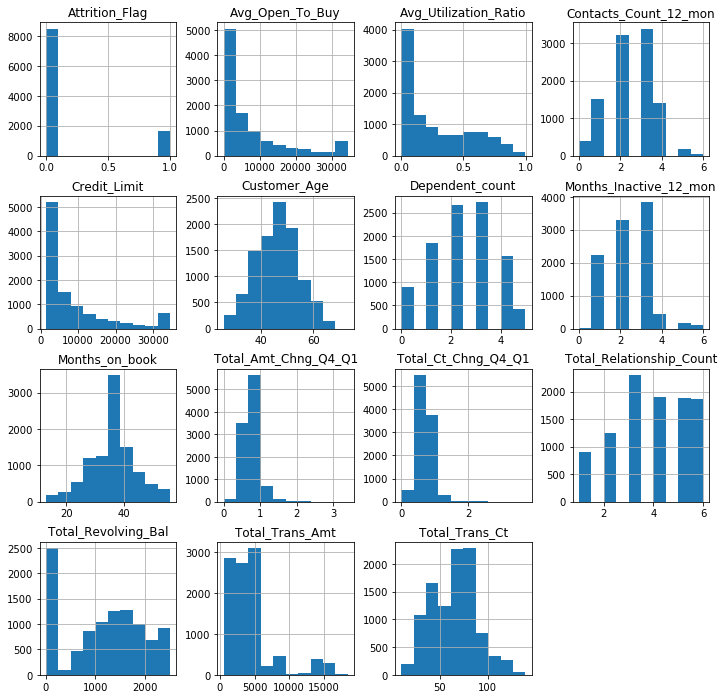

In [8]:
#Examine distributions of numeric features
histlist = bc.hist(figsize = (12,12))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx<br>
Summary of Numeric Feature Distributions<br>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
  
Avg_Open_To_Buy, Avg_Utilization_Rate, & Credit_limit have similar right-skewed distributions.
  
Customer_Age and Months_on_book are similarly normally distributed.
  
Contacts_Count_12_mon and Months_inactive_12_mon have similar distributions.
  
Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 have similar distributions.

Further Evaluation of numeric features is conducted using Correlation Heat Map.  

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Feature Exploration -  Categorical    
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

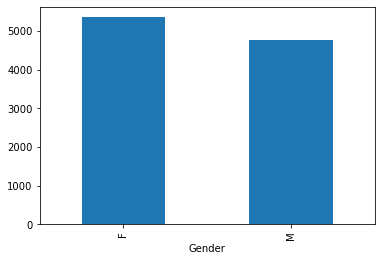

In [9]:
# Distribution of Gender
bc.groupby('Gender').size().plot.bar()
plt.show()

In [10]:
# Explore Gender Relationship with Attrition_Flag
t1 = pd.crosstab(bc['Gender'], bc['Attrition_Flag'])
t1['Total'] = t1.sum(axis=1)
t1.loc['Total'] = t1.sum()
t1['Attrition_Percent'] = ((t1.iloc[:,1])/((t1.iloc[:,0])+(t1.iloc[:,1])))
print(t1)

Attrition_Flag     0     1  Total  Attrition_Percent
Gender                                              
F               4428   930   5358           0.173572
M               4072   697   4769           0.146152
Total           8500  1627  10127           0.160660


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Summary: Women have a higher attrition rate.  
Action: Transform to Binary Variable.  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

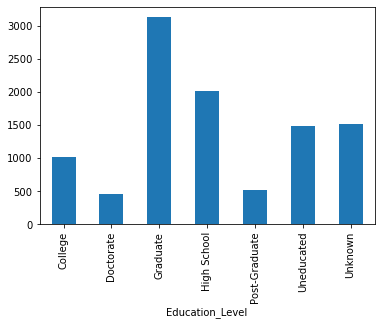

In [11]:
# Distribution of Education Level
bc.groupby('Education_Level').size().plot.bar()
plt.show()

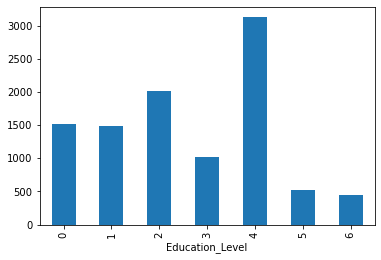

In [12]:
# Maybe we can turn an education into an ordinal variable 
edu_ordinal = {
    "Unknown": 0,
    "Uneducated": 1,
    "High School": 2,
    "College": 3,
    "Graduate": 4,
    "Post-Graduate":5,
    "Doctorate":6
}

def ordinalize(edu):
    return edu_ordinal[edu]
bc.Education_Level = bc.apply(lambda row: ordinalize(row.Education_Level),axis=1)
bc.groupby('Education_Level').size().plot.bar()
plt.show()

In [13]:
# Explore Education_Level Relationship with Attrition_Flag
t2 = pd.crosstab(bc['Education_Level'], bc['Attrition_Flag'])
t2['Total'] = t2.sum(axis=1)
t2.loc['Total'] = t2.sum()
t2['Attrition_Percent'] = ((t2.iloc[:,1])/((t2.iloc[:,0])+(t2.iloc[:,1])))
print(t2)

Attrition_Flag      0     1  Total  Attrition_Percent
Education_Level                                      
0                1263   256   1519           0.168532
1                1250   237   1487           0.159381
2                1707   306   2013           0.152012
3                 859   154   1013           0.152024
4                2641   487   3128           0.155691
5                 424    92    516           0.178295
6                 356    95    451           0.210643
Total            8500  1627  10127           0.160660


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Summary: Clients with Doctorates have the highest attrition rate at ~21%.   
We also note that Clients w/Post_Graduate & Unknown education have higher attrition rates.    
High School Graduates and College educated clients have the lowest attrition rate.  
Uneducated clients have near the average attrition at ~16%.
  
Action: Education Level converted to ordinal variable. <br>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

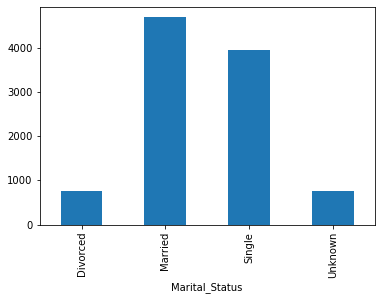

In [14]:
# Explore Marital Status Distribution
bc.groupby('Marital_Status').size().plot.bar()
plt.show()

In [15]:
# Explore Marital_Status Relationship with Attrition_Flag
t3 = pd.crosstab(bc['Marital_Status'], bc['Attrition_Flag'])
t3['Total'] = t3.sum(axis=1)
t3.loc['Total'] = t3.sum()
t3['Attrition_Percent'] = ((t3.iloc[:,1])/((t3.iloc[:,0])+(t3.iloc[:,1])))
print(t3)

Attrition_Flag     0     1  Total  Attrition_Percent
Marital_Status                                      
Divorced         627   121    748           0.161765
Married         3978   709   4687           0.151269
Single          3275   668   3943           0.169414
Unknown          620   129    749           0.172230
Total           8500  1627  10127           0.160660


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Summary: Married Clients have the lowest attrition.  
Unknown, Single, and Divorced have higher than mean attritition rates.  
Action: Create New binary Variable isMarried.  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

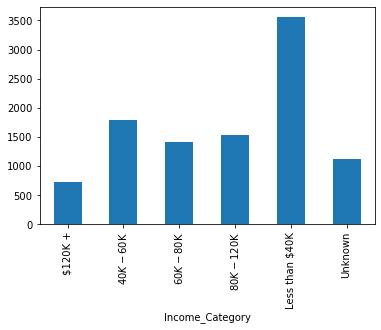

In [16]:
# Explore Income_Category Distribution
bc.groupby('Income_Category').size().plot.bar()
plt.show()

In [17]:
# Explore Income_Category Relationship with Attrition_Flag
t4 = pd.crosstab(bc['Income_Category'], bc['Attrition_Flag'])
t4['Total'] = t4.sum(axis=1)
t4.loc['Total'] = t4.sum()
t4['Attrition_Percent'] = ((t4.iloc[:,1])/((t4.iloc[:,0])+(t4.iloc[:,1])))
print(t4)

Attrition_Flag      0     1  Total  Attrition_Percent
Income_Category                                      
$120K +           601   126    727           0.173315
$40K - $60K      1519   271   1790           0.151397
$60K - $80K      1213   189   1402           0.134807
$80K - $120K     1293   242   1535           0.157655
Less than $40K   2949   612   3561           0.171862
Unknown           925   187   1112           0.168165
Total            8500  1627  10127           0.160660


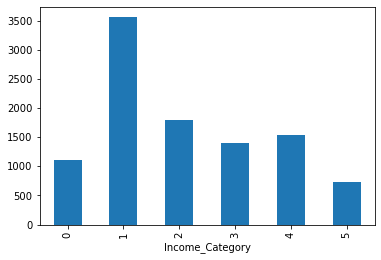

In [18]:
# Maybe we can turn an Income into an ordinal variable 
income_ordinal = {
    "Unknown": 0,
    "Less than $40K": 1,
    "$40K - $60K": 2,
    "$60K - $80K": 3,
    "$80K - $120K": 4,
    "$120K +":5
}

def inc_ordinalize(edu):
    return income_ordinal[edu]
bc.Income_Category = bc.apply(lambda row: inc_ordinalize(row.Income_Category),axis=1)
bc.groupby('Income_Category').size().plot.bar()
plt.show()

In [19]:
# Explore Income_Category Relationship with Attrition_Flag
t4 = pd.crosstab(bc['Income_Category'], bc['Attrition_Flag'])
t4['Total'] = t4.sum(axis=1)
t4.loc['Total'] = t4.sum()
t4['Attrition_Percent'] = ((t4.iloc[:,1])/((t4.iloc[:,0])+(t4.iloc[:,1])))
print(t4)

Attrition_Flag      0     1  Total  Attrition_Percent
Income_Category                                      
0                 925   187   1112           0.168165
1                2949   612   3561           0.171862
2                1519   271   1790           0.151397
3                1213   189   1402           0.134807
4                1293   242   1535           0.157655
5                 601   126    727           0.173315
Total            8500  1627  10127           0.160660


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Summary: 120k+ represent the highest attrition rate, followed by Less than 40k.  
60-80K clients have the lowest attrition rate, followed by 40-60k, then 80-120k.  
Unknown income has a higher than mean attrition rate. 
  
Action: Income_Category converted to ordinal variable to retain this information.  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

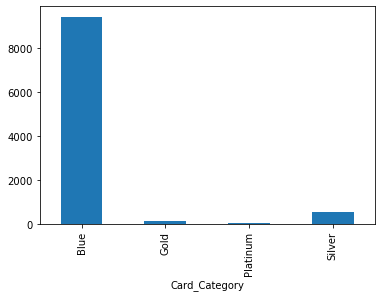

In [20]:
# Explore Card_Category Distribution
bc.groupby('Card_Category').size().plot.bar()
plt.show()

In [21]:
# Explore Card_Category Relationship with Attrition_Flag
t5 = pd.crosstab(bc['Card_Category'], bc['Attrition_Flag'])
t5['Total'] = t5.sum(axis=1)
t5.loc['Total'] = t5.sum()
t5['Attrition_Percent'] = ((t5.iloc[:,1])/((t5.iloc[:,0])+(t5.iloc[:,1])))
print(t5)

Attrition_Flag     0     1  Total  Attrition_Percent
Card_Category                                       
Blue            7917  1519   9436           0.160979
Gold              95    21    116           0.181034
Platinum          15     5     20           0.250000
Silver           473    82    555           0.147748
Total           8500  1627  10127           0.160660


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Summary: While there is a marked difference in the attrition rate based by card  
category, we see that 9436/10127 or 93% of clients are Blue Card holders.  

It should be noted that Gold and Platinum card holders' incremental increase in  
attrition rate is pertinent information that will be mentioned in the recommendations. 

Action: For the purpose of modeling, Card_Category is dropped.  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Feature Transformation -  Categorical    
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

In [22]:
# Tranform Gender and Marital_Status into Binary Features
bc.Gender.replace({'F': 1, 'M': 0}, inplace=True)
bc.Marital_Status.replace({'Married': 1,'Divorced': 0, 'Single': 0, 'Unknown': 0}, inplace=True)

# Rename Transformed Categorical Variables
bc.rename(columns={'Gender': 'isFemale', 'Marital_Status': 'isMarried'}, inplace = True)

#Convert to integers
bc['isFemale'] = bc['isFemale'].astype('int64')
bc['isMarried'] = bc['isMarried'].astype('int64')

bc.head()

,Attrition_Flag,Customer_Age,isFemale,Dependent_count,Education_Level,isMarried,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2,1,3,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,4,0,1,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,4,1,4,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,2,0,1,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,1,1,3,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [23]:
# Drop Card_category
bc_trans = bc.drop(columns=['Card_Category'])

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Target Exploration and Transformation    
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

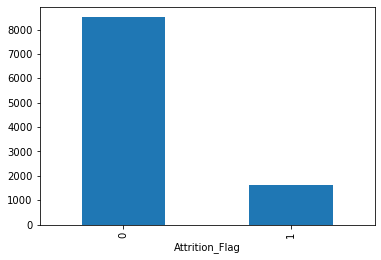

In [24]:
# Examine Attrition Rate
bc_trans.groupby('Attrition_Flag').size().plot.bar()
plt.show()

In [25]:
# Determine extent of churn
churn_count = len(bc_trans[bc_trans['Attrition_Flag']== 1])
no_churn_count = len(bc_trans[bc_trans['Attrition_Flag']==0])
pct_churn_count = churn_count / (churn_count + no_churn_count)
print('Percentage of Attrited Customers is: ', round(pct_churn_count*100,2),'%')
pct_no_churn_count = no_churn_count / (churn_count + no_churn_count)
print('Percentage of Existing Customers is: ', round(pct_no_churn_count*100,2),'%')

Percentage of Attrited Customers is:  16.07 %
Percentage of Existing Customers is:  83.93 %


We note an imbalanced data set with 16.07% churn (attrited customers)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Exploring Feature and Target Correlation to eliminate Multicollinearity   
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

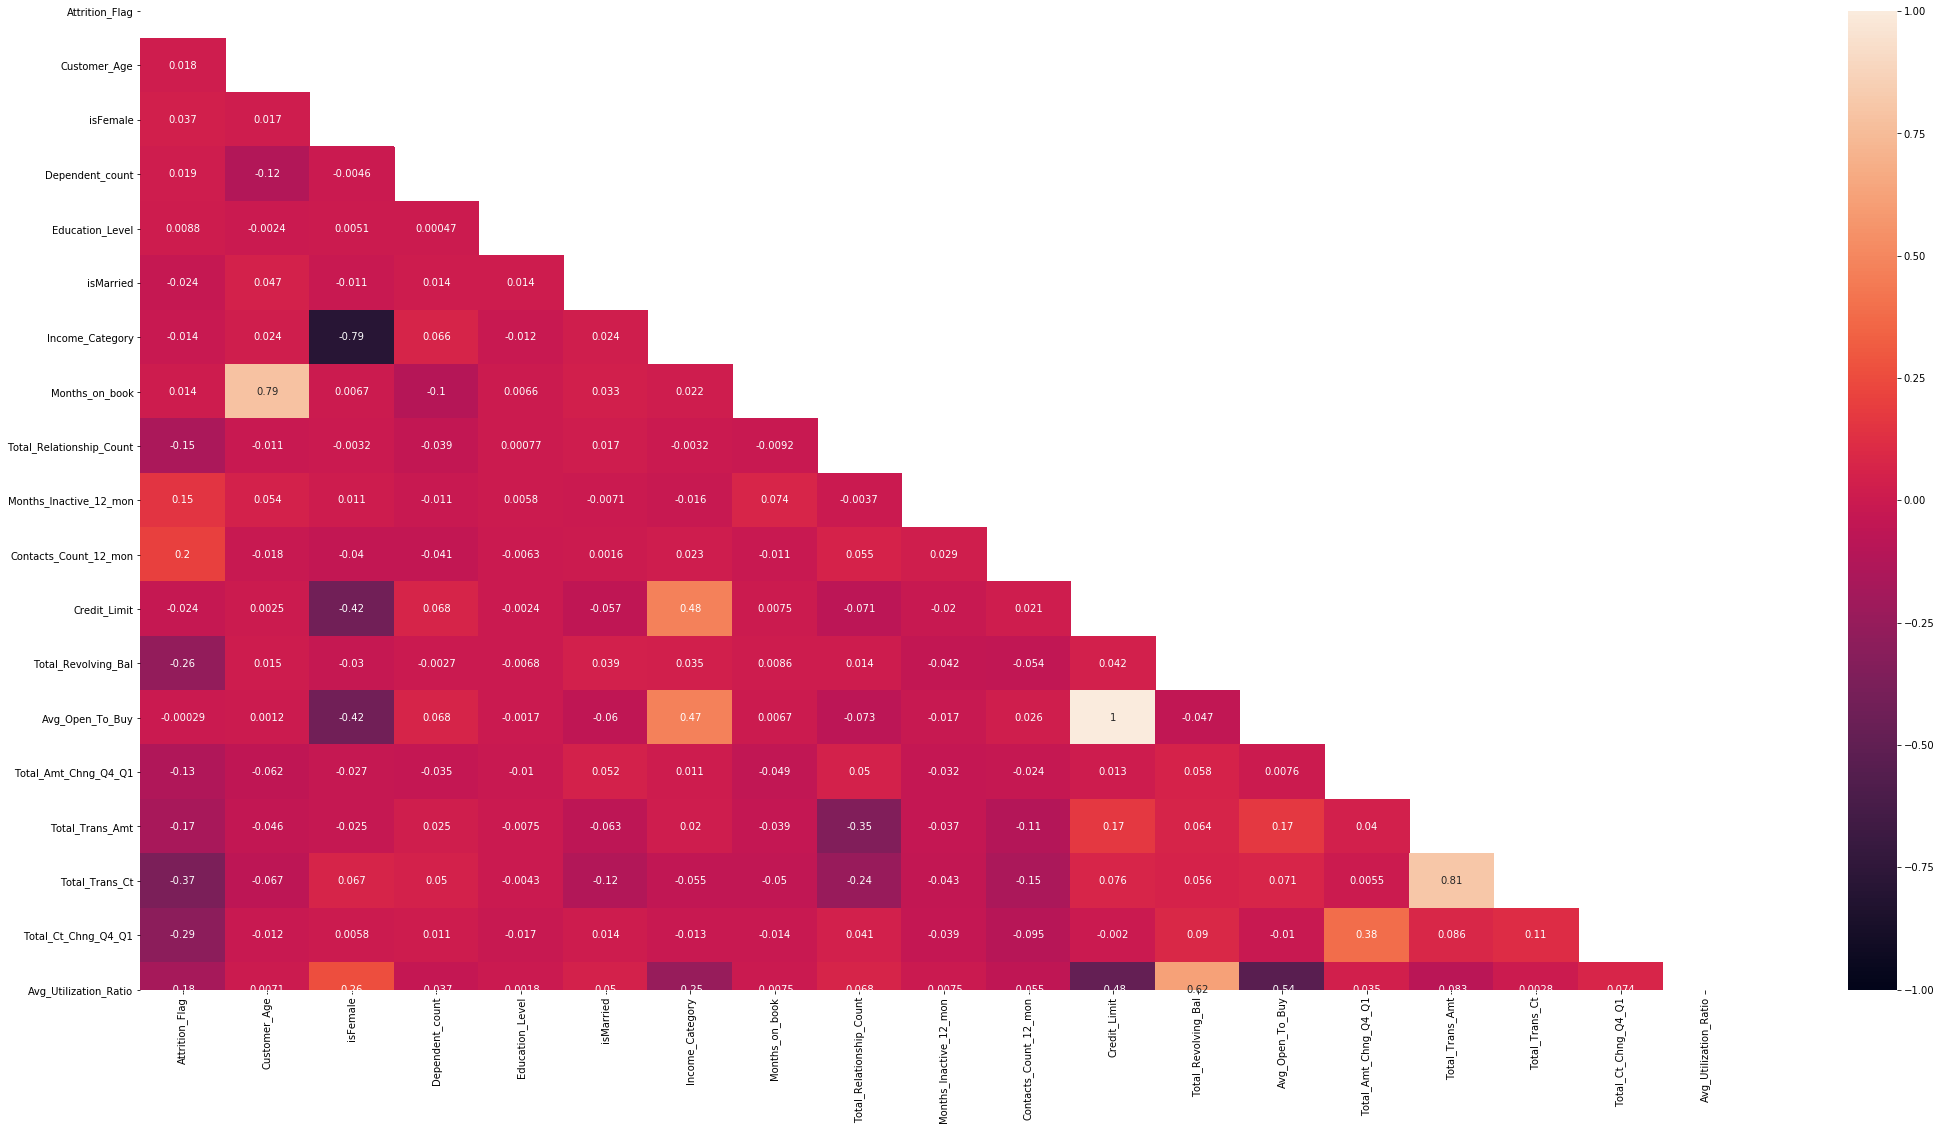

In [26]:
# Correlation Matrix for multicollinearity
plt.figure(figsize=(36, 18))
mask = np.triu(np.ones_like(bc_trans.corr(), dtype=np.bool))
heatmap = sns.heatmap(bc_trans.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Summary: 

Customer_Age and Months_on_book are highly correlated.    
Action: removing Age to retain banking-relationship    
  
Credit limit is perfectly correlated with Avg_open_to_buy  
Action: Drop Credit Limit  
  
Total_Trans_Cnt and Total_Trans_Amt are highly correlated.  
Action: Create New Feature Average Purchase = Total trans amount / Total Trans Count  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  


In [27]:
#Create new Average_Purchase feature
bc_trans['Avg_Purchase'] = (bc_trans['Total_Trans_Amt'])/(bc_trans['Total_Trans_Ct'])

# Drop Customer_Age and Credit Limit
bc_clean = bc_trans.drop(columns=['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct'])

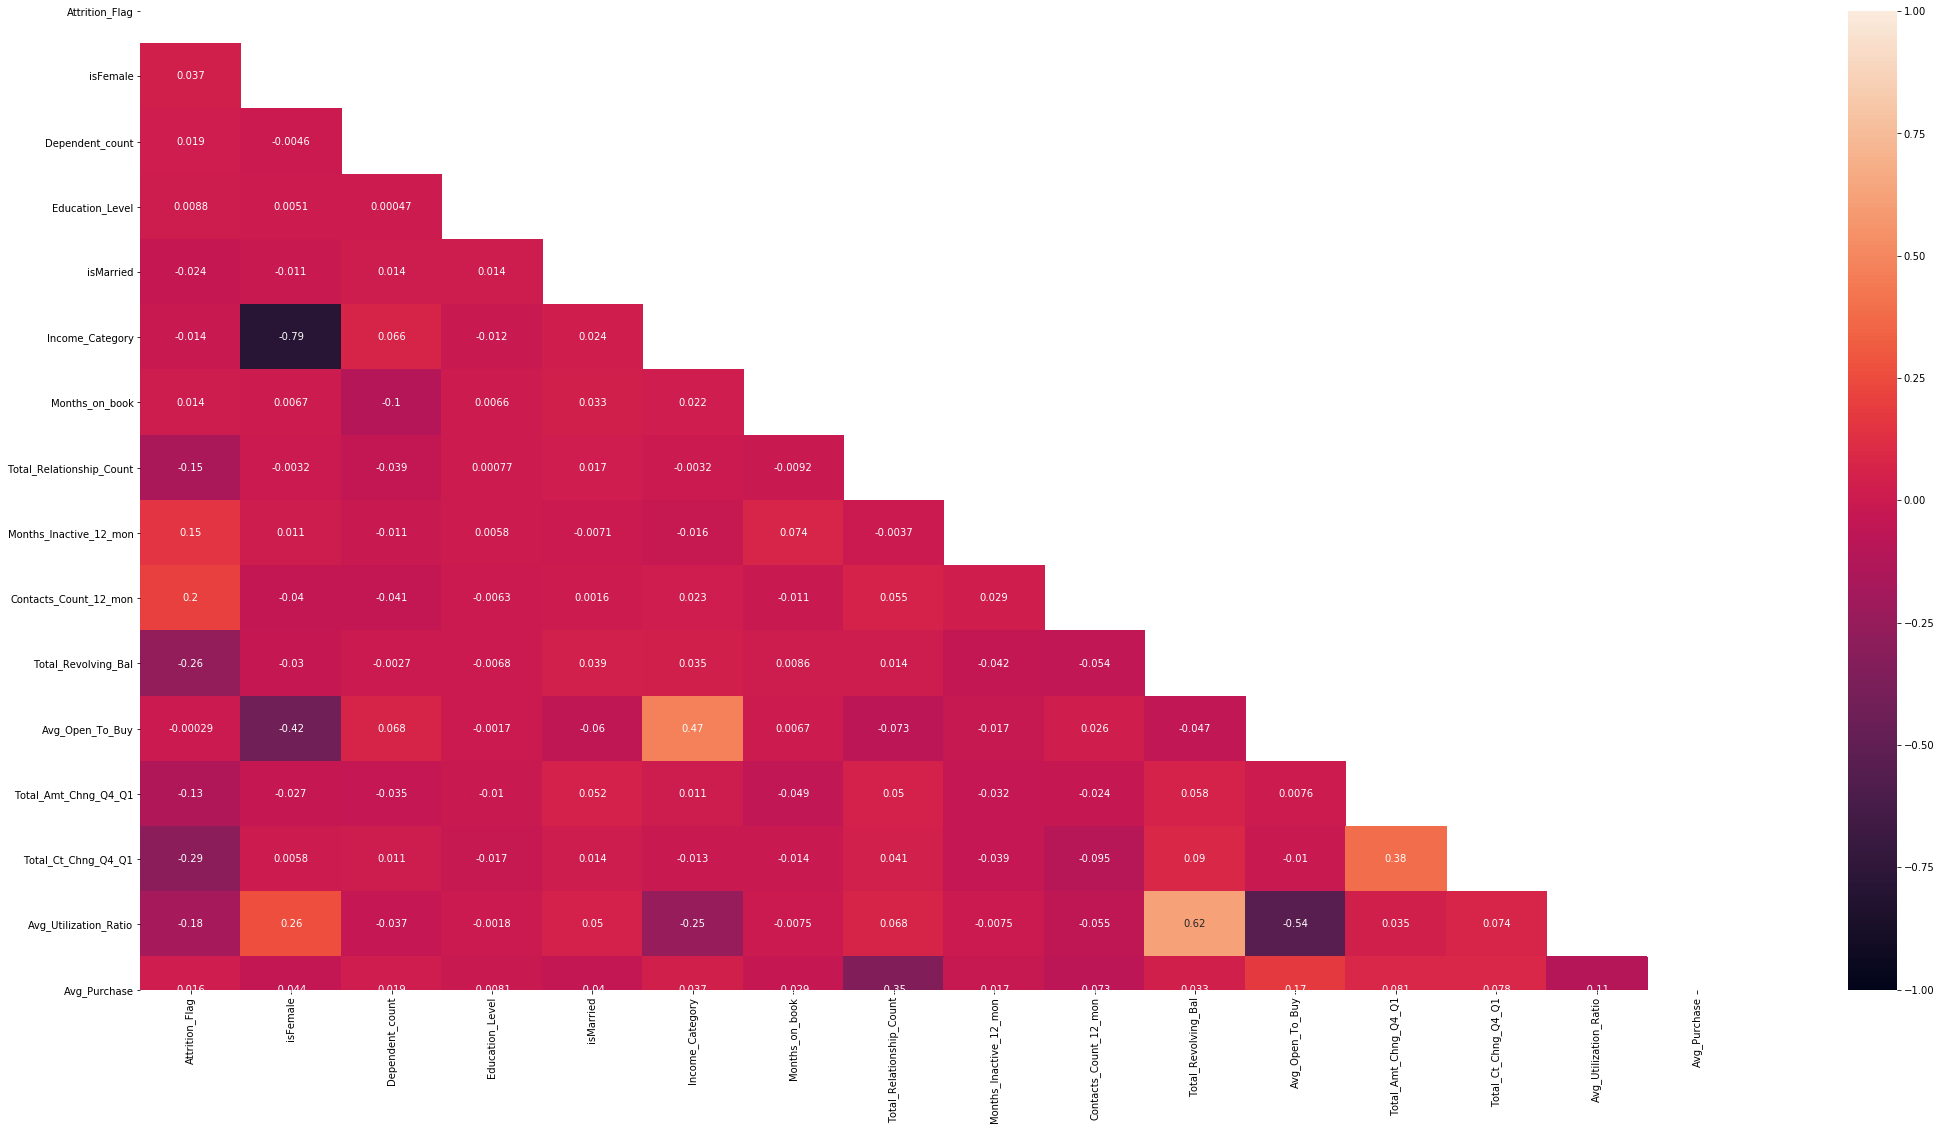

In [28]:
# Re-examine correlations
# Correlation Matrix for multicollinearity
plt.figure(figsize=(36, 18))
mask = np.triu(np.ones_like(bc_clean.corr(), dtype=np.bool))
heatmap = sns.heatmap(bc_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Model Strategies:<br>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Logistic Regression: (Martin insert explanation)<br>
<br>
SVM: (Martin insert explanation)<br>
<br>
Linear Discriminant Analysis: (Filipp insert explanation)<br>
<br>
Quadratic Discriminant Analysis: (Filipp insert explanation)<br>
<br>
Random Forest: (Filipp insert explanation)<br>
<br>
Neural Network: (Roberto insert explanation)<br>
<br>
Ensemble - Voting Classifier: (Roberto insert explanation)<br>
<br> 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Logistic Regression  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

In [29]:
# Helper functions
def confusionMatrices(model, title):
    print(title + ' - Training results')
    classificationSummary(train_y, model.predict(train_X))
    print(title + ' - Validation results')
    y_pred = model.predict(val_X)
    print(title + ' Classification Summary')
    classificationSummary(val_y, y_pred)
    print(title + ' Classification Report')
    print(classification_report(val_y, y_pred))

In [30]:
# Alias the dataset for individual scaling to optimize models
bc_Log = bc_clean.copy()

# Min Max Scale the Data set for Neural Network
scaler = MinMaxScaler()
bc_Lognorm = pd.DataFrame(scaler.fit_transform(bc_Log), index=df.index,
columns=bc_clean.columns)

#Partition the dataset
train_X, train_y, val_X, val_y, test_X, test_y = partition_fully(bc_Lognorm)

In [31]:
# Train a baseline Logistic Regression
logreg = LogisticRegression(random_state = 42)

logreg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
logreg_confusion = confusionMatrices(logreg, 'Base Logistic Regression Model')

Base Logistic Regression Model - Training results
Confusion Matrix (Accuracy 0.8751)

       Prediction
Actual    0    1
     0 5807  110
     1  775  396
Base Logistic Regression Model - Validation results
Base Logistic Regression Model Classification Summary
Confusion Matrix (Accuracy 0.8767)

       Prediction
Actual   0   1
     0 846  19
     1 106  43
Base Logistic Regression Model Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       865
         1.0       0.69      0.29      0.41       149

    accuracy                           0.88      1014
   macro avg       0.79      0.63      0.67      1014
weighted avg       0.86      0.88      0.85      1014



In [33]:
# Tune Logistic Regression for optimal solver, and C

grid = {'max_iter': [100, 500, 1000],\
                   'penalty': ['l2'],\
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],\
                   'C': [1e42, 0.01, 0.1, 1, 10]}

logr = LogisticRegression(random_state = 42)


gridSearch_logr = GridSearchCV(logr, grid, scoring = 'f1_weighted', cv=5, n_jobs=-1)
gridSearch_logr.fit(train_X, train_y)
print('Improved score: ', gridSearch_logr.best_score_)
print('Improved parameters: ', gridSearch_logr.best_params_)

tuned_logr = gridSearch_logr.best_estimator_

Improved score:  0.8678260356510574
Improved parameters:  {'C': 1e+42, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [34]:
# Evaluate the tuned Logistic Regression Model on the training and validation set

tuned_logr_confusion = confusionMatrices(tuned_logr, 'Tuned Log_Reg')

Tuned Log_Reg - Training results
Confusion Matrix (Accuracy 0.8837)

       Prediction
Actual    0    1
     0 5767  150
     1  674  497
Tuned Log_Reg - Validation results
Tuned Log_Reg Classification Summary
Confusion Matrix (Accuracy 0.8836)

       Prediction
Actual   0   1
     0 839  26
     1  92  57
Tuned Log_Reg Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       865
         1.0       0.69      0.38      0.49       149

    accuracy                           0.88      1014
   macro avg       0.79      0.68      0.71      1014
weighted avg       0.87      0.88      0.87      1014



In [35]:
tunedlogr_pred = tuned_logr.predict(test_X)

# Evaluate tuningNN on test data
classificationSummary(test_y, tunedlogr_pred)

# Evaluate Classification Report on test data
print(classification_report(test_y,tunedlogr_pred))

Confusion Matrix (Accuracy 0.8790)

       Prediction
Actual    0    1
     0 1659   59
     1  186  121
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1718
         1.0       0.67      0.39      0.50       307

    accuracy                           0.88      2025
   macro avg       0.79      0.68      0.71      2025
weighted avg       0.86      0.88      0.87      2025



Our Tuned Logistic Regression model outperforms the base, with an F-score of roughly 87 percent on the validation set. For the final test set, we were able to secure an F-score of 93% for non-attrited customers, and 50% for the positive target.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
SVM  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

In [36]:
# Run & evaluate base SVM model
svm = SVC(kernel='rbf', gamma = 'auto', random_state = 42, max_iter = 3000)
svm.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=3000, probability=False, random_state=42, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
# Evaluate Base SVM model on training and Validation sets
svm_confusion = confusionMatrices(svm, 'Base SVM model')

Base SVM model - Training results
Confusion Matrix (Accuracy 0.8368)

       Prediction
Actual    0    1
     0 5917    0
     1 1157   14
Base SVM model - Validation results
Base SVM model Classification Summary
Confusion Matrix (Accuracy 0.8531)

       Prediction
Actual   0   1
     0 864   1
     1 148   1
Base SVM model Classification Report
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       865
         1.0       0.50      0.01      0.01       149

    accuracy                           0.85      1014
   macro avg       0.68      0.50      0.47      1014
weighted avg       0.80      0.85      0.79      1014



In [38]:
# Tune SVM for optimal Kernel, gamma, and degree
grid = {
    'kernel': ['rbf', 'poly'],
    'gamma': [0.1, 1, 2],
    'degree': [1, 2, 3]
            }

tunedSVM = SVC(random_state = 42)
gridSearchSVM = GridSearchCV(tunedSVM, grid, scoring = 'f1_weighted', cv=5, n_jobs=-1)
gridSearchSVM.fit(train_X, train_y)
print('Improved score: ', gridSearchSVM.best_score_)
print('Improved parameters: ', gridSearchSVM.best_params_)

tunedSVD = gridSearchSVM.best_estimator_

# Evaluate the tuned SVM on the training and validation set
tunedSVD_confusion = confusionMatrices(tunedSVD, 'Tuned SVM')


Improved score:  0.8855079079860171
Improved parameters:  {'degree': 3, 'gamma': 1, 'kernel': 'poly'}
Tuned SVM - Training results
Confusion Matrix (Accuracy 0.9134)

       Prediction
Actual    0    1
     0 5807  110
     1  504  667
Tuned SVM - Validation results
Tuned SVM Classification Summary
Confusion Matrix (Accuracy 0.8915)

       Prediction
Actual   0   1
     0 835  30
     1  80  69
Tuned SVM Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       865
         1.0       0.70      0.46      0.56       149

    accuracy                           0.89      1014
   macro avg       0.80      0.71      0.75      1014
weighted avg       0.88      0.89      0.88      1014



In [39]:
# Create Callable Predict function
tunedSVD_pred = tunedSVD.predict(test_X)

# Evaluate Tuned SVD on test data
classificationSummary(test_y, tunedSVD_pred)

# Evaluate Classification Report on test data
print(classification_report(test_y,tunedSVD_pred))

Confusion Matrix (Accuracy 0.8938)

       Prediction
Actual    0    1
     0 1666   52
     1  163  144
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1718
         1.0       0.73      0.47      0.57       307

    accuracy                           0.89      2025
   macro avg       0.82      0.72      0.76      2025
weighted avg       0.88      0.89      0.88      2025



Our Tuned SVM model outperforms the base, with an F-score of roughly 88 percent on the validation set. For the final test set, we were able to secure an F-score of 94% for non-attrited customers, and 57% for the positive target.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Linear Discriminant Analysis  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

In [40]:
#LDA
bc_lda = bc_clean.drop(
    ["Avg_Purchase","isFemale","Education_Level"],axis=1
)

train_X2, train_y2, val_X2, val_y2, test_X2, test_y2 = partition_fully(bc_lda)
#LDA
solvers=["svd","lsqr","eigen"]
shrinkage = "auto"

for this_solver in solvers:
    lda = LinearDiscriminantAnalysis(solver=this_solver)
    lda.fit(train_X2,train_y2)
    this_f1 = f1_score(val_y,lda.predict(val_X2))
    print(this_f1)
    
final_lda = LinearDiscriminantAnalysis().fit(train_X2,train_y2)
print(classification_report(test_y2,final_lda.predict(test_X2)))

0.44954128440366975
0.44954128440366975
0.44954128440366975
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1718
           1       0.69      0.37      0.48       307

    accuracy                           0.88      2025
   macro avg       0.79      0.67      0.71      2025
weighted avg       0.87      0.88      0.86      2025



Our LDA performs best with average purchase, gender, and education taken out, with an F-score of roughly 45 percent on the validation set. For the final test set, we were able to secure an F-score of 93% for non-attrited customers, and 48% for the positive target.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Quadratic Discriminant Analysis  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

In [41]:
#QDA
#Partition the dataset
bc_qda = bc_clean.drop(
        ["Avg_Purchase",
         "isFemale",
         "Avg_Open_To_Buy",
         "Total_Amt_Chng_Q4_Q1"],
        axis=1)

#scaler = MinMaxScaler()
#bc_qda = pd.DataFrame(scaler.fit_transform(bc_qda), index=df.index,columns=bc_qda.columns)
                     
train_X3, train_y3, val_X3, val_y3, test_X3, test_y3 = partition_fully(bc_qda)

#train QDA over several reg params
scores=[]
reg_params = np.arange(0,1,0.1)
for i in reg_params:
    qda = QuadraticDiscriminantAnalysis(reg_param=i)
    qda.fit(train_X3,train_y3)
    this_f1 = (f1_score(val_y3,qda.predict(val_X3)))
    scores.append({i,this_f1})
    
print(max(scores))

qda = QuadraticDiscriminantAnalysis().fit(train_X3,train_y3)
print(classification_report(test_y3,qda.predict(test_X3)))

{0.0, 0.4876033057851239}
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1718
           1       0.72      0.45      0.56       307

    accuracy                           0.89      2025
   macro avg       0.81      0.71      0.75      2025
weighted avg       0.88      0.89      0.88      2025



In conclusion, our best performing QDA model has no regularization parameter and drops average purchase, gender, open to buy, and the total amount change between Q4 and Q1 from the predictor set. All of these variables were demonstrated to have caused a net increase in F1 score when dropped.

On the test set, we secured an F-score of 56% for the positive target, and an expectedly high f-score of 97% on the negative case (no attrition).

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Random Forest   
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx 

Our primary strategy here is to iterate over several turning parameters and select the optimal combination by picking the best validation set F1 score, and applying that model to the test set.

results = []
estimators = np.arange(100,500,50)
critertia = ['gini','entropy']
max_depth = np.arange(20,41,5)
min_samples = np.arange(2,21,2)
max_features = ['sqrt','auto','log2']

for n_trees in estimators:
    for crit in criteria:
        for max_d in max_depth:
            for min_s in min_samples:
                for max_f in max_features:
                    
                    this_RF = RandomForestClassifier()
                    this_RF.fit(train_x,train_y)
                    this_f1 = f1_score(val_y,this_RF.predict(val_x))
                    results.append({
                        'f1':this_f1,
                        'n_trees': n_trees,
                        'criterion': crit,
                        'max_depth': max_d,
                        'min_sample_split':min_s,
                        'max_features': max_f
                    })
                    
    results.sort(key=lambda x: x['f1'], reverse=True)

In [42]:
#print(results[0])
#apply to the test set given our optimal params
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=30,min_samples_split=2,
                           max_features='sqrt')
rf.fit(train_X3,train_y3)
print(classification_report(test_y3,rf.predict(test_X3)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1718
           1       0.75      0.54      0.63       307

    accuracy                           0.90      2025
   macro avg       0.83      0.76      0.79      2025
weighted avg       0.90      0.90      0.90      2025



In conclusion, our random forest classifier was able to product a 63% F1 score for the positive case in our target variable. 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Neural Network  
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

In [43]:
# Alias the dataset for individual scaling to optimize models
bc_NN = bc_clean.copy()

# Min Max Scale the Data set for Neural Network
scaler = MinMaxScaler()
bc_NN = pd.DataFrame(scaler.fit_transform(bc_NN), index=df.index,
columns=bc_clean.columns)

#Partition the dataset
train_X, train_y, val_X, val_y, test_X, test_y = partition_fully(bc_NN)

In [44]:
# Train Neural Network with 1 hidden layer
clf = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs',
                    max_iter = 500, random_state=42)
clf.fit(train_X, train_y.values)
clf_confusion = confusionMatrices(clf, 'Neural network w/1 hidden layer')

Neural network w/1 hidden layer - Training results
Confusion Matrix (Accuracy 0.8846)

       Prediction
Actual    0    1
     0 5757  160
     1  658  513
Neural network w/1 hidden layer - Validation results
Neural network w/1 hidden layer Classification Summary
Confusion Matrix (Accuracy 0.8856)

       Prediction
Actual   0   1
     0 839  26
     1  90  59
Neural network w/1 hidden layer Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94       865
         1.0       0.69      0.40      0.50       149

    accuracy                           0.89      1014
   macro avg       0.80      0.68      0.72      1014
weighted avg       0.87      0.89      0.87      1014



In [45]:
# Tune the Neural Network for the optimal # of hidden layers
param_grid = {
    'hidden_layer_sizes': list(range(1, 10)),
}
tuningNN = MLPClassifier(activation='logistic', solver='lbfgs', learning_rate = 'adaptive', random_state=42, max_iter=5000)
gridSearch = GridSearchCV(tuningNN, param_grid, scoring = 'f1_weighted', cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

tunedNN = gridSearch.best_estimator_
tunedNN_confusion = confusionMatrices(tunedNN, 'Tuned Neural network')

Improved score:  0.8990487424990168
Improved parameters:  {'hidden_layer_sizes': 9}
Tuned Neural network - Training results
Confusion Matrix (Accuracy 0.9276)

       Prediction
Actual    0    1
     0 5772  145
     1  368  803
Tuned Neural network - Validation results
Tuned Neural network Classification Summary
Confusion Matrix (Accuracy 0.8994)

       Prediction
Actual   0   1
     0 832  33
     1  69  80
Tuned Neural network Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       865
         1.0       0.71      0.54      0.61       149

    accuracy                           0.90      1014
   macro avg       0.82      0.75      0.78      1014
weighted avg       0.89      0.90      0.89      1014



In [46]:
tunedNN_pred = tunedNN.predict(test_X)

# Evaluate tuningNN on test data
classificationSummary(test_y, tunedNN_pred)

# Evaluate Classification Report on test data
print(classification_report(test_y,tunedNN_pred))

Confusion Matrix (Accuracy 0.9121)

       Prediction
Actual    0    1
     0 1653   65
     1  113  194
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1718
         1.0       0.75      0.63      0.69       307

    accuracy                           0.91      2025
   macro avg       0.84      0.80      0.82      2025
weighted avg       0.91      0.91      0.91      2025



Our Tuned Neural Network model outperforms the base, with an F-score of roughly 89 percent on the validation set. For the final test set, we were able to secure an F-score of 95% for non-attrited customers, and 69% for the positive target.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Model Evaluation:    
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

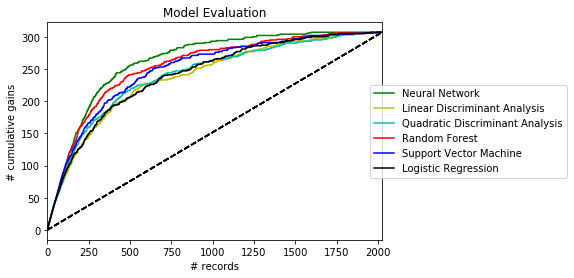

In [47]:
def modelGainsChart(modelNN, modelSVD, modelLOGR, modellda, modelqda, modelrm, title, ax=None):
    NN_proba = tunedNN.predict_proba(test_X)
    resultNN = pd.DataFrame({
        'actualNN': test_y,
        'probNN': [p[1] for p in NN_proba]
    })
        
    resultSVD = pd.DataFrame({
        'actualSVD': test_y,
        'probSVD': tunedSVD.decision_function(test_X)
    })
    
    resultLOGR = pd.DataFrame({
        'actualLOGR': test_y,
        'probLOGR': tuned_logr.decision_function(test_X)
    })
    
    resultlda = pd.DataFrame({
        'actuallda': test_y,
        'problda': final_lda.decision_function(test_X2)
    })
    
    resultqda = pd.DataFrame({
        'actualqda': test_y,
        'probqda': qda.decision_function(test_X3)
    })
    
    rf_proba = rf.predict_proba(test_X3)
    resultrf = pd.DataFrame({
        'actualrf': test_y3,
        'probrf': [p[1] for p in rf_proba]
    })
    
    
    
    resultNN = resultNN.sort_values(by=['probNN'], ascending=False).reset_index(drop=True)
    ax = gainsChart(resultNN.actualNN, ax=ax, color = 'g', label='Neural Network')
        
    resultlda = resultlda.sort_values(by=['problda'], ascending=False).reset_index(drop=True)
    ax = gainsChart(resultlda.actuallda, ax=ax, color = 'y', label='Linear Discriminant Analysis')
    
    resultqda = resultqda.sort_values(by=['probqda'], ascending=False).reset_index(drop=True)
    ax = gainsChart(resultqda.actualqda, ax=ax, color = 'c', label='Quadratic Discriminant Analysis')
    
    resultrf = resultrf.sort_values(by=['probrf'], ascending=False).reset_index(drop=True)
    ax = gainsChart(resultrf.actualrf, ax=ax, color = 'r', label='Random Forest') 

    resultSVD = resultSVD.sort_values(by=['probSVD'], ascending=False).reset_index(drop=True)
    ax = gainsChart(resultSVD.actualSVD, ax=ax, color = 'b', label='Support Vector Machine')
        
    #ax.legend(['Neural Network', 'LDA', 'QDA', 'Random Forest','SVM','Log R'])
    resultLOGR = resultLOGR.sort_values(by=['probLOGR'], ascending=False).reset_index(drop=True)
    ax = gainsChart(resultLOGR.actualLOGR, ax=ax, color = 'k', label = 'Logistic Regression')
    
    
    
    ax.set_title(title)
    
    return ax

ax = modelGainsChart(tunedNN, final_lda, qda, rf, tunedSVD, tuned_logr, 'Model Evaluation')
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Ensemble - Voting Classifier<br>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

In [48]:
# create a dictionary of our models
estimators=[('Neural Network', tunedNN), ('Random Forest', rf), ('Support Vector Machine', tunedSVD)]
# create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard', weights = [3,2,1])
# fit model to training data
ensemble.fit(train_X, train_y)
# Confusion Matrix of Ensemble model
ensemble_confusion = confusionMatrices(ensemble, 'Ensemble')

Ensemble - Training results
Confusion Matrix (Accuracy 0.9399)

       Prediction
Actual    0    1
     0 5859   58
     1  368  803
Ensemble - Validation results
Ensemble Classification Summary
Confusion Matrix (Accuracy 0.9083)

       Prediction
Actual   0   1
     0 846  19
     1  74  75
Ensemble Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       865
         1.0       0.80      0.50      0.62       149

    accuracy                           0.91      1014
   macro avg       0.86      0.74      0.78      1014
weighted avg       0.90      0.91      0.90      1014



In [49]:
# Create Callable Predict function
ensemble_pred = ensemble.predict(test_X)

# Evaluate Tuned SVD on test data
classificationSummary(test_y, ensemble_pred)

# Evaluate Classification Report on test data
print(classification_report(test_y,ensemble_pred))

Confusion Matrix (Accuracy 0.9151)

       Prediction
Actual    0    1
     0 1683   35
     1  137  170
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1718
         1.0       0.83      0.55      0.66       307

    accuracy                           0.92      2025
   macro avg       0.88      0.77      0.81      2025
weighted avg       0.91      0.92      0.91      2025



We note that the ensemble approach did not yield higher f1-scores; therefore, a single prediction model was chosen.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Results and Final Model Selection:<br>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

Based on the Lift Chart and best classification performance for our Attrited customers, Neural Network is chosen as the best model for classifying/identifying attrition.<br>
<br>
In order to provide the stakeholder with actionable insights, we chose the 2nd best performing model (Random Forest) to rank feature importance for attrition.

In [50]:
df = pd.DataFrame({
    'Feature Importance': rf.feature_importances_,
}, index=list(train_X3.columns))
print(df.sort_values(by=['Feature Importance'], ascending=False))


                          Feature Importance
Total_Ct_Chng_Q4_Q1                 0.268359
Total_Revolving_Bal                 0.155176
Avg_Utilization_Ratio               0.115270
Months_on_book                      0.089332
Contacts_Count_12_mon               0.079577
Total_Relationship_Count            0.072650
Months_Inactive_12_mon              0.058173
Education_Level                     0.050388
Dependent_count                     0.046984
Income_Category                     0.046031
isMarried                           0.018060


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  
Discussion and Conclusion:<br>
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  

Faced with increasing credit card customer attrition, the bank manager requested<br>
the data science team's assistance predciting which customers would churn.<br>
<br>
Based on our findings, the Neural Network correctly identifies 63% of attrited customers.<br>
Because the Neural Network is a "black box" model, Random Forest, which identifies 63% <br>
of attrited customers but misclassifies 1% more Existing Customers, was used to identify<br>
the most important features that contributed to attrition.<br>
<br>
Recommendations:<br>
Short Term: Immediately contact the top 60% of customers that are most likely to attrite based on NN/RF.<br>
Mid-term: Measure the impact of customer contacts on the churn rate.<br>
Long-term: Segment the churner customers to Identify profiles of your churning customers to tailor banking features/options/rewards<br>
<br>
